Name:Rifki Maulana



Email:rifkiibul@gmail.com

In [ ]:
# Download rockpaperscissors dataset
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [7]:
# Extract files
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir         = '/tmp/rockpaperscissors/rps-cv-images'
base_dir_r       = os.path.join(base_dir, 'rock')
base_dir_p       = os.path.join(base_dir, 'paper')
base_dir_s       = os.path.join(base_dir, 'scissors')

In [8]:
# Split train set (60%) and validation set (40%)
!pip install split-folders
import splitfolders as sf

sf.ratio(
    base_dir,
    output = os.path.join('/tmp/rockpaperscissors/image'),
    seed   = None,
    ratio  = (0.6, 0.4)
)

Copying files: 2188 files [00:00, 2411.91 files/s]


In [9]:
# Set train and validation directory for each rock, paper, scissors
image_dir = '/tmp/rockpaperscissors/image'

train_dir_r      = os.path.join(image_dir, 'train/rock')
train_dir_p      = os.path.join(image_dir, 'train/paper')
train_dir_s      = os.path.join(image_dir, 'train/scissors')

validation_dir_r = os.path.join(image_dir, 'val/rock')
validation_dir_p = os.path.join(image_dir, 'val/paper')
validation_dir_s = os.path.join(image_dir, 'val/scissors')

In [10]:
# Count the number of train and validation images
train_set = (
      len(os.listdir(train_dir_r))
    + len(os.listdir(train_dir_p))
    + len(os.listdir(train_dir_s))
)

validation_set = (
      len(os.listdir(validation_dir_r))
    + len(os.listdir(validation_dir_p))
    + len(os.listdir(validation_dir_s))
)

print(f'Train Set      : {train_set}')
print(f'Validation Set : {validation_set}')

Train Set      : 1312
Validation Set : 876


In [11]:
train_dir      = os.path.join(image_dir, 'train')
validation_dir = os.path.join(image_dir, 'val')

print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['paper', 'rock', 'scissors']
['paper', 'rock', 'scissors']


In [12]:
!rm -rf /tmp/rockpaperscissors/rps-cv-images/.ipynb_checkpoints

In [15]:
# Image Augmentation for duplicating image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale          = 1./255,
    rotation_range   = 20,
    horizontal_flip  = True,
    shear_range      = 0.2,
    fill_mode        = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale          = 1./255
)

In [14]:
# Prepare the training and validation data with .flow_from_directory()
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (80, 120),
    batch_size  = 32,
    class_mode  = 'categorical',
    shuffle     = True
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (80, 120),
    batch_size  = 32,
    class_mode  = 'categorical',
    shuffle     = True
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
# Build the model with Convolutional Neural Network (CNN) and MaxPooling
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,  (3, 3), activation='relu', input_shape=(80, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64,  (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 118, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 39, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 57, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 18, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 26, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 13, 128)       

In [18]:
# Compile the model with 'categorical_crossentropy' loss function and Adam optimimzer
model.compile(
    loss      = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics   = ['accuracy']
)

In [20]:
# Create TensorBoard
%load_ext tensorboard
import datetime, os
logdir = os.path.join('/content/sample_data', datetime.datetime.now().strftime('%YYYY%mm%dd-%HH%MM%SS'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Train the model with model.fit()
history = model.fit(
    train_generator,
    steps_per_epoch  = 25,
    epochs           = 20,
    validation_data  = validation_generator,
    validation_steps = 5,
    verbose          = 2,
    callbacks        = [tensorboard_callback]
)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/20
25/25 - 33s - loss: 1.0395 - accuracy: 0.4387 - val_loss: 0.7556 - val_accuracy: 0.7500 - 33s/epoch - 1s/step
Epoch 2/20
25/25 - 32s - loss: 0.4495 - accuracy: 0.8512 - val_loss: 0.2417 - val_accuracy: 0.9125 - 32s/epoch - 1s/step
Epoch 3/20
25/25 - 44s - loss: 0.2574 - accuracy: 0.9125 - val_loss: 0.2588 - val_accuracy: 0.9250 - 44s/epoch - 2s/step
Epoch 4/20
25/25 - 29s - loss: 0.2285 - accuracy: 0.9312 - val_loss: 0.1979 - val_accuracy: 0.9375 - 29s/epoch - 1s/step
Epoch 5/20
25/25 - 29s - loss: 0.2257 - accuracy: 0.9350 - val_loss: 0.1937 - val_accuracy: 0.9312 - 29s/epoch - 1s/step
Epoch 6/20
25/25 - 30s - loss: 0.1651 - accuracy: 0.9538 - val_loss: 0.2158 - val_accuracy: 0.9312 - 30s/epoch - 1s/step
Epoch 7/20
25/25 - 32s - loss: 0.1763 - accuracy: 0.9438 - val_loss: 0.1953 - val_accuracy: 0.9375 - 32s/epoch - 1s/step
Epoch 8/20
25/25 - 30s - loss: 0.1227 - accuracy: 0.9625 - val_

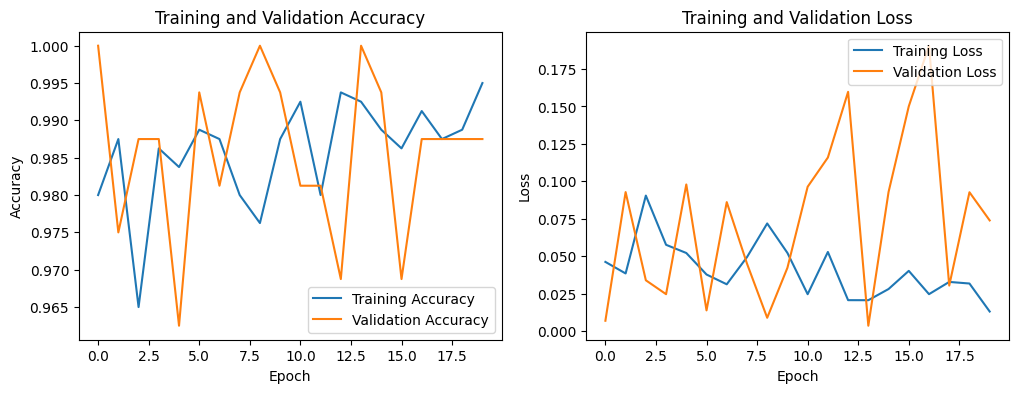

In [24]:
# Visualize accuracy and loss plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

epoch        = 20
epoch_range  = range(epoch)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, accuracy,     label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss,     label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Saving Toyota Supra.jpg to Toyota Supra.jpg
1/1 [==============================] - 0s 40ms/step
Toyota Supra.jpg
Paper


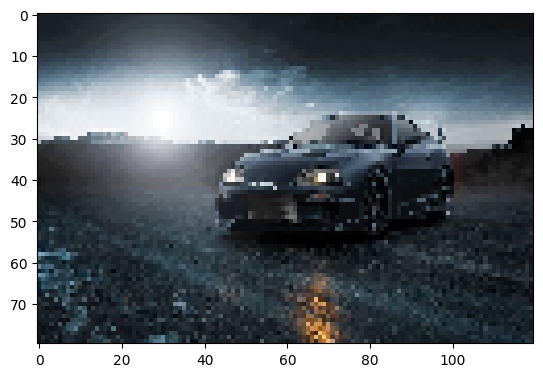

In [26]:
# Predicting Image
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img  = image.load_img(path, target_size = (80, 120))

    imgplot = plt.imshow(img)
    x       = image.img_to_array(img)
    x       = np.expand_dims(x, axis = 0)
    images  = np.vstack([x])

    classes = model.predict(images, batch_size = 10)
    output  = np.argmax(classes)
    print(fn)

    if output == 0:
        print('Paper')
    elif output == 1:
        print('Rock')
    else:
        print('Scissors')